#Лабораторная работа №6
##Основные понятия ООП. Инкапсуляция. Классы. Декораторы.

Основная задача "Эксперимент"
Нужно написать класс "Эксперимент", который производит работу с данными.

Вы получили данные в виде словаря. Словарь имеет следующую структуру {'date': '2023-01-05', 'signal': 'path_to_ecg_signal', 'parameters':{}}

##Интерфейс

Нужно написать класс, где должны поддерживаться следующие методы:

- конструктор — принимает словарь и создает соответствующие поля (self.data, self.path_signal, self.parameters)
- get_datе() — возвращает дату записи сигнала.
- get_signal_length() — возвращает длину сигнала.
- plot_signal() — выводит график сигнала.
- _signal_filtration(signal, filtration_parametres) — производит фильтрацию сигнала.
- _signal_find_peaks(signal, find_peaks_parametres) — находит точки максимума сигнала и возвращает их в виде списка.
- _calculate_RR_intervals() — производит расчет длительности RR интервалов и возвращает длины RR интервалов в виде списка. В этом методе вызываются методы - _signal_filtration и _signal_find_peak.
- get_RR_statistics() — возвращает статистические характеристики RR интервалов на записи ECG - среднее, std, min, max (в виде словаря). В этом методе вызывается метод _calculate_RR_intervals.
*можно добавить свои методы

##Файл с ЭКГ сигналом (ecg.csv) в папке

In [38]:
!pip install wfdb

In [39]:
!pip install heartpy

In [40]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import wfdb
import heartpy as hp
from scipy.signal import find_peaks

In [41]:
class Experiment:

    def __init__(self, data):
        self.data = data
        self.path_signal = data['signal']
        self.date = data['date']
        self.parameters = data['parameters']
        self.signal = self.load_signal()

    def load_signal(self):
        data = pd.read_csv(self.path_signal)
        signal = data['MLII']
        return signal

    def det_date(self):
        return self.date

    def get_signal_length(self):
        return len(self.signal)

    def plot_signal(self):
        plt.figure(figsize=(12, 8))
        signal_to_plot = self.signal
        plt.plot(signal_to_plot)
        plt.show()

    def _signal_filtration(self, signal, filtration_perams):
        filtered_signal = hp.filter_signal(signal, **filtration_perams)
        return filtered_signal

    def _signal_find_peaks(self, signal, find_peaks_parametres):
        peaks, _ = find_peaks(filtered, **find_peaks_parametres)
        return peaks

    def _calculate_RR_intervals(self):
        filtration_params = self.parameters['filtration']
        find_peaks_params = self.parameters['find_peaks']
        filtered_signal = self._signal_filtration(self.signal, filtration_params)
        peaks = self._signal_find_peaks(filtered_signal, find_peaks_params)
        rr_intervals = np.diff(peaks) / filtration_params['sample_rate']
        return rr_intervals

    def get_RR_statistics(self):
        rr_intervals = self._calculate_RR_intervals()

        rr_stats = {
            'mean': np.mean(rr_intervals),
            'std': np.std(rr_intervals),
            'min': np.min(rr_intervals),
            'max': np.max(rr_intervals)
        }
        self.plot_signal()
        return rr_stats

In [47]:

class Experiment:
    def __init__(self, data_dict):
        self.data = data_dict
        self.path_signal = data_dict['signal']
        self.parameters = data_dict['parameters']
        self.signal = None
        self.filtered_signal = None
        self.peaks = None
        self.rr_intervals = None

    def _load_signal(self):
        df = pd.read_csv(self.path_signal)
        self.signal = df['MLII'].values

    def get_date(self):
        return self.data['date']

    def get_signal_length(self):
        return len(self.signal)

    def plot_signal(self):
        plt.plot(self.signal)
        plt.title("ECG Signal")
        plt.xlabel("Sample")
        plt.ylabel("Amplitude")
        plt.show()

    def _signal_filtration(self, signal, cutoff=[0.75, 3.5], sample_rate=100, order=3, filtertype='bandpass'):
        return hp.filter_signal(signal, cutoff=cutoff, sample_rate=sample_rate, order=order, filtertype=filtertype)

    def _signal_find_peaks(self, signal, height=20):
        peaks, _ = find_peaks(signal, height=height)
        return peaks

    def _calculate_RR_intervals(self):
        self.filtered_signal = self._signal_filtration(self.signal)
        self.peaks = self._signal_find_peaks(self.filtered_signal)
        self.rr_intervals = np.diff(self.peaks)
        return self.rr_intervals

    def get_RR_statistics(self):
        if self.rr_intervals is None:
            self._calculate_RR_intervals()
        rr_stats = {
            'mean': np.mean(self.rr_intervals),
            'std': np.std(self.rr_intervals),
            'min': np.min(self.rr_intervals),
            'max': np.max(self.rr_intervals)
        }
        return rr_stats

In [49]:
data_dict = {
    'date': '2023-01-05',
    'signal': 'ecg.csv',
    'parameters': {}
}

In [50]:
experiment = Experiment(data_dict)
experiment._load_signal()

Date: 2023-01-05
Signal Length: 20000


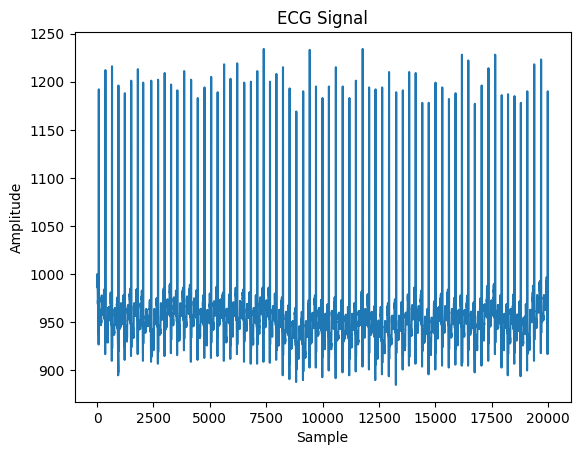

RR Statistics: {'mean': 288.6231884057971, 'std': 31.077323597890175, 'min': 66, 'max': 358}


In [51]:
print("Date:", experiment.get_date())
print("Signal Length:", experiment.get_signal_length())
experiment.plot_signal()
print("RR Statistics:", experiment.get_RR_statistics())